## classification input and outputs

Binary and multiple



## Architecture of a classification  model

classification  is a  problem if predicting whether is one thing or another ()there cab be multiple things as the option

## 1. make classification data get it ready

In [1]:
import sklearn
from sklearn.datasets import make_circles

## make 1000 sample 
n_sample =1000
# create circle 
X, y = make_circles(n_sample,
                  noise = 0.03,
                  random_state =42)

In [2]:
len(X) , len(y)

(1000, 1000)

In [3]:
print(f"frirst five sample{X[:5]}")
print(f"frirst five sample{y[:5]}")


frirst five sample[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
frirst five sample[1 1 1 1 0]


In [4]:
X.shape

(1000, 2)

In [5]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
## make the dataframe of circle data
import pandas as pd
circles = pd.DataFrame({'x1':X[:,0],
                        'x2':X[:,1],
                      'label':y })

In [7]:
circles

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


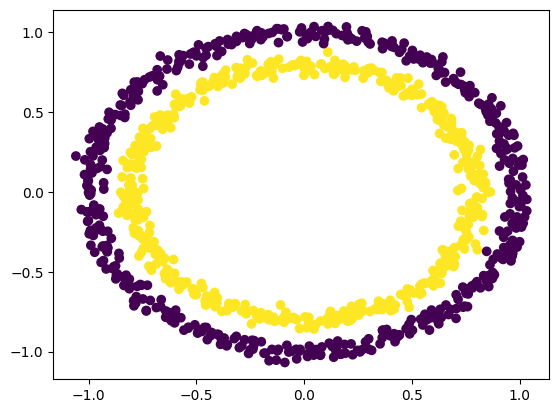

In [8]:
## visualize 
import matplotlib.pyplot as plt
plt.scatter(x =X[:,0],
           y = X[:,1],
            c =y,
           );

note : the data we are working with is often refferred to as a toy dataset, a dataset that 
small enough to exeriment but still sizeable enough to prectice fundamentals .

### 1.1 check input and output shape

In [9]:
X.shape , y.shape

((1000, 2), (1000,))

In [10]:
## viwe the first example of feature and labels 
x_sample =X[0]
y_sample =y[0]


print(f'x sample {x_sample}')
print(f'y sample {y_sample}')


x sample [0.75424625 0.23148074]
y sample 1


### 1.2 turn data into tensor and create train and test split

In [11]:
import torch
torch.__version__

'2.3.0+cu121'

In [12]:
type(X)

numpy.ndarray

In [13]:
X =torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [14]:
X[:5] , y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
## split data into training and test 
from sklearn.model_selection import train_test_split

X_train,X_test , y_train , y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.2,
                                                    random_state = 42)

In [16]:
len(X_train)

800

## building a model
let's nuild a model our blue and red dots

to do so , we want to:
1. setup device agnosistic code so our code will run on an accelerator (GPU) if there is one
2. construct a model (by subclassing nn.Module)
3. Define a loss function and optimizer
4. Create a training and test loop

In [17]:
import torch 
from torch import nn

# make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.cuda.is_available()

/home/anubhav/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


False

In [18]:
!nvidia-smi


Sun May 19 10:59:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   42C    P8               3W /  80W |      8MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Now we have setpu the device agnostic code lets create a model thath 
1. subclasses 'nn.MOdule' (almost all models in PyTorch subclass 'nn.Module' )
2. Crete 2 'nn.Linear()' layers that are capable of handling the shapes of our data
3. Defines a 'forward()' method that outlines the forward pass (or forward compuation) of the model
4. INstatiate an instance of  our model class and send it to the target device 

In [19]:
# 1. Construct a model that subclass of nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. create 2 nn.Linear Layers capabale of handling the shape of our data
        # self.layer_1 = nn.Linear(in_features =2,out_features =5) # takes in 2 features and upscale to 5 features 
        # self.layer_2 = nn.Linear(in_features = 5,out_features = 1) # take all the out features as input and 1 out feature will we be final 
    # define the forward method 
        self.two_layers =  nn.Sequential(
                            nn.Linear(in_features = 2 , out_features = 5 ),
                            nn.Linear(in_features =5 , out_features =1)
                            ).to(device)
    def forward(self,x):
        return self.layer_2(self.layer_1(x)) # x->layer_1 -> layer_2 -> output
# instatitarte an isntance of our model class and send it to the target device 

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [20]:
device

'cpu'

In [21]:
next(model_0.parameters()).device

device(type='cpu')

In [22]:
## let's replicate the model aboove using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features = 2 , out_features = 5 ),
    nn.Linear(in_features =5 , out_features =1)
).to(device)

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4274,  0.1125],
                      [ 0.5407, -0.3728],
                      [ 0.1342,  0.5065],
                      [ 0.6830, -0.0158],
                      [-0.2233, -0.0313]])),
             ('0.bias', tensor([-0.4318, -0.6113,  0.5734, -0.3993, -0.2177])),
             ('1.weight',
              tensor([[ 0.3332,  0.2167,  0.2248, -0.1726,  0.2336]])),
             ('1.bias', tensor([-0.2639]))])

In [23]:
# make predictions 
with torch.inference_mode():
   untrained_preds = model_0(X_test.to(device))

In [24]:
untrained_preds.shape , X_test.shape

(torch.Size([200, 1]), torch.Size([200, 2]))

In [25]:
untrained_preds[:10] ,X_test[:10]

(tensor([[-0.3931],
         [-0.3280],
         [-0.4981],
         [-0.3636],
         [-0.3942],
         [-0.3553],
         [-0.2545],
         [-0.2606],
         [-0.5024],
         [-0.3225]]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]))

In [26]:
print(f'the tound of numbers : {torch.round(untrained_preds)[:10]}')

the tound of numbers : tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-0.]])


In [27]:
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

### 2.1 setup loss funtion and optmizer

Which function or loss function or optmizer we should use 

it is problem specific 

for example Regression we might want MAE aor MSE 
fro classification we might want binary cross entropy or categorical cross entropy (cross entropy)
As a reminder the loss function measure how *wrong* your model prediction are 
and for optimizers , two of the most common and useful are SGD and Adam , however pytorch has many built-in options 

* for the loss function we are going to use `torch.nn.BECWithLogitsLoss()` ,fro more or what binary cross entropy
* fro differenet optimizer see `torch.optim`

In [28]:
## setup the loss function 
loss_fn =nn.BCEWithLogitsLoss() # sigmoid activation function built-in
# loss_fn = nn.BCELoss() requrires input to have gone through the sigmodiod activation function

optimizer = torch.optim.SGD(params = model_0.parameters() , 
                           lr =0.1)


/home/anubhav/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [29]:
# caluculate the accuracy  


In [30]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4274,  0.1125],
                      [ 0.5407, -0.3728],
                      [ 0.1342,  0.5065],
                      [ 0.6830, -0.0158],
                      [-0.2233, -0.0313]])),
             ('0.bias', tensor([-0.4318, -0.6113,  0.5734, -0.3993, -0.2177])),
             ('1.weight',
              tensor([[ 0.3332,  0.2167,  0.2248, -0.1726,  0.2336]])),
             ('1.bias', tensor([-0.2639]))])

In [31]:
def accruracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

## train model 

To train our model , we are going to need to build a training loop:
1. forward pass
2. calculate the loss
3. optimizer
4. loss backword
5. otimizer step (gradient decent ) 

### 3.1 going from  raw logitis -> preditiction probilities -> preditiction labels
our model outputsare going to be raw logiics 

we can convert thses logitics into prediction probilities by passing them to some kind of activation function (e.g. sigmoid for binary corsse entropy and softmax for multiclass classification 

then we can convert outr model's prediction probilities to **preiction label** by either rounding them or aking the 'argmax'

In [32]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.3931],
        [-0.3280],
        [-0.4981],
        [-0.3636],
        [-0.3942]])

In [33]:
device

'cpu'

In [34]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [35]:
# use sigmoid activation function  on our model logits to trn tem into probilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4030],
        [0.4187],
        [0.3780],
        [0.4101],
        [0.4027]])

In [36]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

For our prediction probility values we need to perform a  range-style round on them 
* `y_pred_probs >= 0.5 , y=1`
* `y_pred_probs < 0.5 , y =0`

In [37]:
# find the predicted labels 
y_preds = torch.round(y_pred_probs)

In [38]:
# IN FULL 
y_pred_labels  = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality 
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# get rid for extra dimension 
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [39]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

## building trainign and testing loop


In [40]:
device

'cpu'

In [41]:
!nvidia-smi

Sun May 19 10:59:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   42C    P8               3W /  80W |      8MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [42]:
torch.manual_seed(42)

#set epoch
epochs =100

# put dat to target device
X_train,y_train = X_train.to(device) ,y_train.to(device)
X_test ,y_test = X_test.to(device) ,y_test.to(device)

for epoch in range(epochs):
    ## training 
    model_0.train()

# forward pass
    y_logits = model_0(X_train).squeeze() 
    y_pred =torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred label 

 # calculate accuracy 
    # loss =loss_fn(torch.sigmoid(y_logits),# nn.BCELoss 
                 # y_train)
    loss =loss_fn(y_logits, ## nn.BCEWithLOgitsLoss exepct raw logits  
                 y_train)
    ac = accruracy_fn(y_true = y_train ,y_pred = y_pred)

# optimizer zero grad 
    optimizer.zero_grad()

    # loass backward (backpropogation)
    loss.backward()

    # optmizer
    optimizer.step()

##  testing 
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred =torch.round(torch.sigmoid(test_logits))

   ## calculate test loss 
        test_loss = loss_fn(test_logits,
                      y_test)
        test_acc = accruracy_fn(y_true = y_test ,
                           y_pred = test_pred)
# print out waht is happining 
    if epoch%10 == 0:
        print(f"Epoch {epoch} | loss : {loss:.5f} | acc : {ac:.2f}%  | test acc {test_acc}% ")

Epoch 0 | loss : 0.71276 | acc : 50.00%  | test acc 50.0% 
Epoch 10 | loss : 0.69888 | acc : 50.00%  | test acc 50.0% 
Epoch 20 | loss : 0.69494 | acc : 46.25%  | test acc 42.5% 
Epoch 30 | loss : 0.69380 | acc : 47.50%  | test acc 46.5% 
Epoch 40 | loss : 0.69345 | acc : 49.88%  | test acc 45.5% 
Epoch 50 | loss : 0.69333 | acc : 50.00%  | test acc 46.5% 
Epoch 60 | loss : 0.69327 | acc : 50.00%  | test acc 46.5% 
Epoch 70 | loss : 0.69323 | acc : 51.00%  | test acc 46.0% 
Epoch 80 | loss : 0.69320 | acc : 50.88%  | test acc 46.5% 
Epoch 90 | loss : 0.69318 | acc : 51.00%  | test acc 47.0% 


## 4. make prediction and evaluate the model

From the metric it looks like our model isn't learning anything.....

so to inspect it let's make some predictions and make them visual 
in other words 'visuallize ,vislize '

to do so ,we are going to important a function called `plot_decision _boundary`

In [43]:
import requests
from pathlib import Path

# URL to the raw content of the helper_functions.py file
url = 'https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py'

# Check if the helper_function.py file already exists
if Path('helper_functions.py').is_file():
    print('The helper_functions.py already exists, skipping download')
else:
    print('Downloading helper_functions.py')

    # Send a GET request to the raw content URL
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Write the content to a file
        with open('helper_functions.py', 'wb') as f:
            f.write(response.content)
        print('Download completed')
    else:
        print(f'Failed to download file, status code: {response.status_code}')

# Import the functions from the helper_functions.py file
from helper_functions import plot_predictions, plot_decision_boundary


The helper_functions.py already exists, skipping download


In [44]:
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable


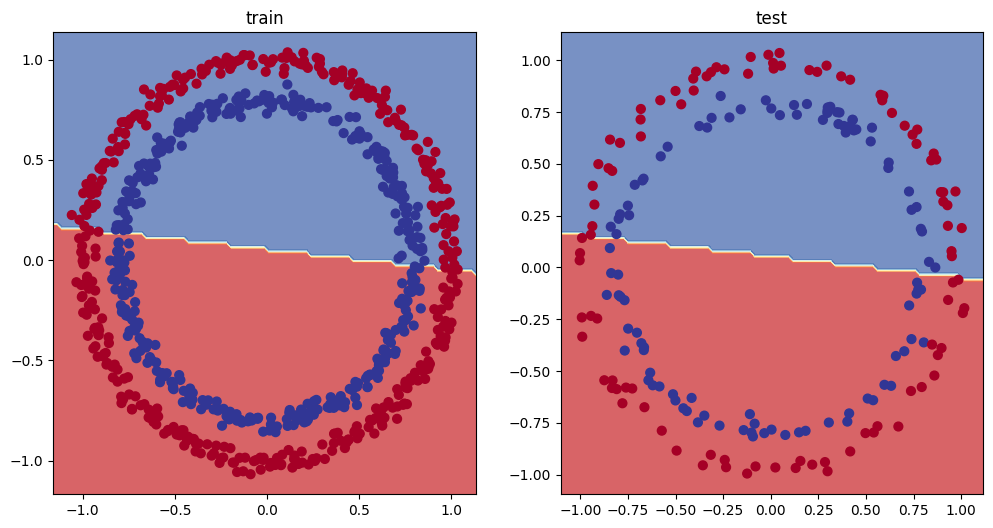

In [45]:

from helper_functions import plot_predictions , plot_decision_boundary
# plot decision boundary of the model 
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_0 ,X_train ,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_0,X_test,y_test)

 ### 5 improving a model (from a model presepective)
 * Add more layers - give the model more chancees to learn about pattern in the data
 * Add more hidden units - go from 5 didden units to 10 units
 * fir for longer
 * chaning the activation function
 * change the learning rate
 *  change the loss function

   these options are all from a model prespective because thsy directly with the model rather than the data
   And because these option are all values we can change thsy are refferes as hyperparameter
   
   lets try and improve by:
   * adding more hinddent layer
   * increase the number of layer
   * increse the number of epochs 
   

In [46]:
## creating a new model to improve 

In [47]:
class CircleMOdel1V1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features =2 , out_features = 10)
        self.layer_2 = nn.Linear(in_features =10 , out_features = 10)
        self.layer_3 = nn.Linear(in_features =10 , out_features = 1)

    def forward(self,X):
        # z = self.layer_1(X)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(X)))
        # return z

model_1 = CircleMOdel1V1().to(device)
model_1
        

CircleMOdel1V1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [48]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [49]:
# create a loss function 
loss_fn = nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params =model_1.parameters(),
                           lr =0.1)

# 

In [50]:
def accruracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [51]:
# write a training and evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# train for longer
epochs =1000
# put data on the target device
X_train ,y_train =X_train.to(device) ,y_train.to(device)
X_test ,y_test = X_test.to(device) ,y_test.to(device)

for epoch in range(epochs):
    ## training 
    model_1.train()

   # forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

   # calculat ethe loss /acc
    loss = loss_fn(y_logits,y_train)
    acc = accruracy_fn(y_true = y_train,
                     y_pred = y_pred)
    # optimizer zero 
    optimizer.zero_grad()

    # 4. loss backward 
    optimizer.step()

    ## testing 
    model_1.eval()
    with torch.inference_mode():
        #1. forward pass
        test_logits - model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # calculate loss
        test_loss -loss_fn(test_logits,
                          y_test)
        test_acc = accruracy_fn(y_true = y_test,
                               y_pred = test_pred)

    if epoch % 100 == 0:
        print(f'epoch : {epoch} |Loss {loss:.5f} | acc {acc:.2f}% | test_loss {test_loss:.5f} | test_acc {test_acc:.2f}')

epoch : 0 |Loss 0.69396 | acc 50.88% | test_loss 0.69616 | test_acc 47.00
epoch : 100 |Loss 0.69396 | acc 50.88% | test_loss 0.69616 | test_acc 47.00
epoch : 200 |Loss 0.69396 | acc 50.88% | test_loss 0.69616 | test_acc 47.00
epoch : 300 |Loss 0.69396 | acc 50.88% | test_loss 0.69616 | test_acc 47.00
epoch : 400 |Loss 0.69396 | acc 50.88% | test_loss 0.69616 | test_acc 47.00
epoch : 500 |Loss 0.69396 | acc 50.88% | test_loss 0.69616 | test_acc 47.00
epoch : 600 |Loss 0.69396 | acc 50.88% | test_loss 0.69616 | test_acc 47.00
epoch : 700 |Loss 0.69396 | acc 50.88% | test_loss 0.69616 | test_acc 47.00
epoch : 800 |Loss 0.69396 | acc 50.88% | test_loss 0.69616 | test_acc 47.00
epoch : 900 |Loss 0.69396 | acc 50.88% | test_loss 0.69616 | test_acc 47.00


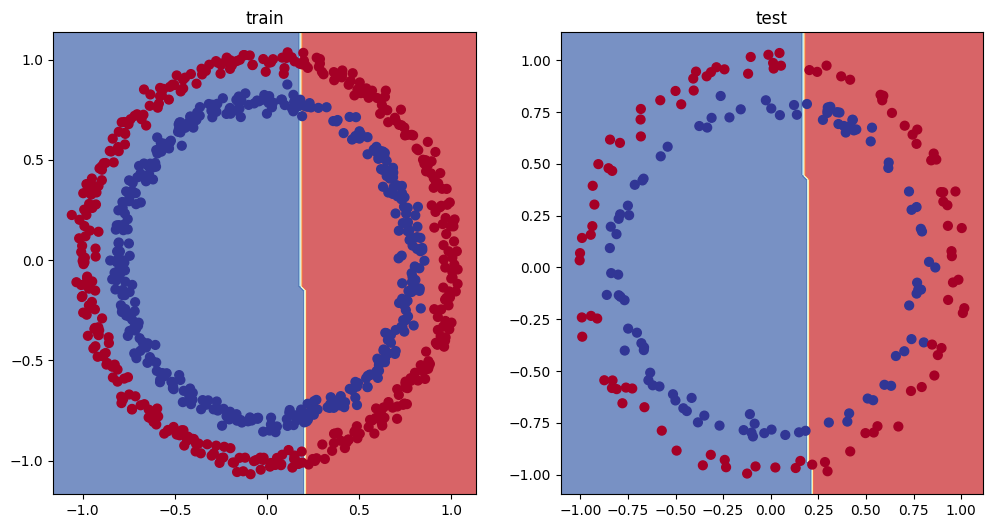

In [52]:
# plot decision boundary 

from helper_functions import plot_predictions , plot_decision_boundary
# plot decision boundary of the model 
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_1 ,X_train ,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_1,X_test,y_test)

In [53]:
device 

'cpu'

## prepraring data to see if our model can fit a straight line 

one way to troubleshoot the problem is to test out problem 


In [54]:
## create some data (same as norebook 01)

weight =0.7
bias =0.3
start =0
end = 1
step =0.01

# create regression 
X_regression =torch.arange(start,end,step).unsqueeze(dim =1)
y_regression = weight * X_regression + bias # linear regression formula (without epsilon)

# check data
print(len(X_regression))
X_regression[:5] , y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [55]:
# create train asnd test split 
train_split =int(0.8 *len(X_regression))
X_train_regression , y_train_regression  =X_regression[:train_split] ,y_regression[:train_split]
X_test_regression , y_test_regression = X_regression[train_split:],y_regression[train_split:]

In [56]:
# check the length
len(X_train_regression) , len(X_test_regression) , len(y_train_regression) ,len(y_test_regression)

(80, 20, 80, 20)

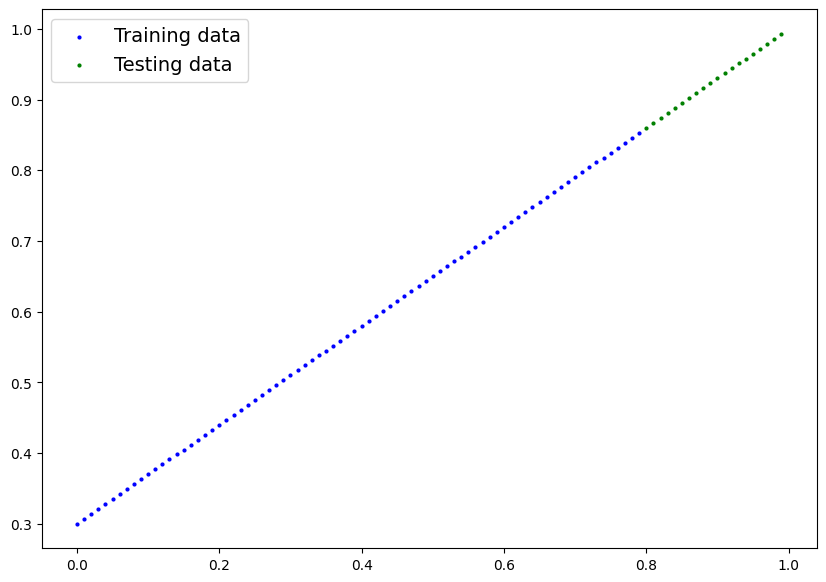

In [57]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data =X_test_regression,
                 test_labels = y_test_regression
                )

In [58]:
model_1

CircleMOdel1V1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

#### 5.2 Adjust `model_1` to fit a stright line


In [59]:
# same archintecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features = 1 , out_features =10 ),
    nn.Linear(in_features = 10 , out_features =10 ),
    nn.Linear(in_features = 10 , out_features =1 ),
    
).to(device)

In [60]:
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [61]:
# loss and optimization 
loss_fn =nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                           lr =0.01)


In [62]:
# train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)


In [63]:
## set the number of epochs 
epochs = 1000

# put the data on the target devicce
X_train_regression ,y_train_regression  = X_train_regression.to(device) ,y_train_regression.to(device)
X_test_regression , y_test_regression = X_test_regression.to(device) , y_test_regression.to(device)

# triainig 
for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss =loss_fn(y_pred , y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # testing 
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred,y_test_regression)

   # print what happining 
    if epoch%100== 0 :
        print(f'epoch {epoch} | loss {loss:.5f} | test loss {test_loss:.5f}  ')

epoch 0 | loss 0.75986 | test loss 0.91103  
epoch 100 | loss 0.02858 | test loss 0.00081  
epoch 200 | loss 0.02533 | test loss 0.00209  
epoch 300 | loss 0.02137 | test loss 0.00305  
epoch 400 | loss 0.01964 | test loss 0.00341  
epoch 500 | loss 0.01940 | test loss 0.00387  
epoch 600 | loss 0.01903 | test loss 0.00379  
epoch 700 | loss 0.01878 | test loss 0.00381  
epoch 800 | loss 0.01840 | test loss 0.00329  
epoch 900 | loss 0.01798 | test loss 0.00360  


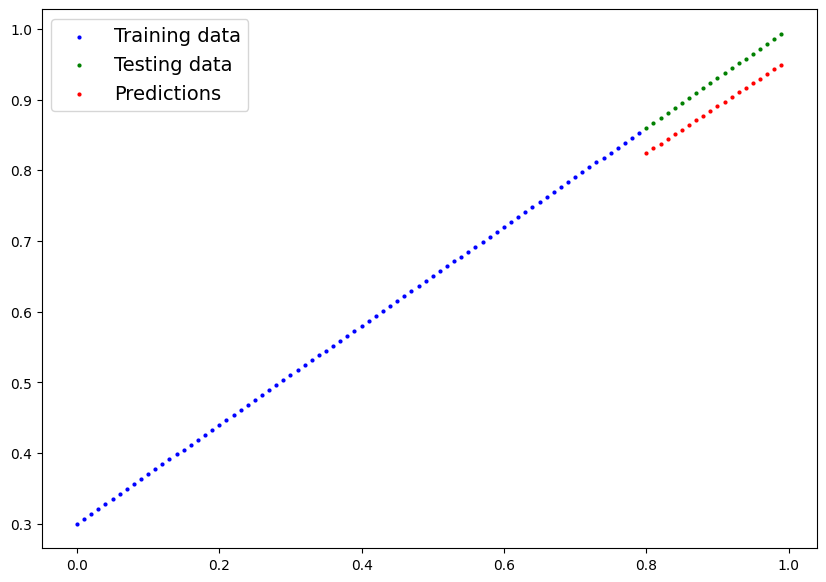

In [64]:
# turn on evaluation mode 
model_2.eval()

# make predictions 
with torch.inference_mode():
    y_pred = model_2(X_test_regression)

#plot data and prediction s
plot_predictions(train_data = X_train_regression.cpu(),
                 train_labels = y_train_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 test_labels = y_test_regression.cpu(),
                 predictions = y_pred.cpu()
                )

## 6. the missing piece : non-lineearity

"what patterns could you draw if you were given an infinite amount of a stright and non-stright lines?"
or in machine learning terms an infinite of linear and non-linearty 

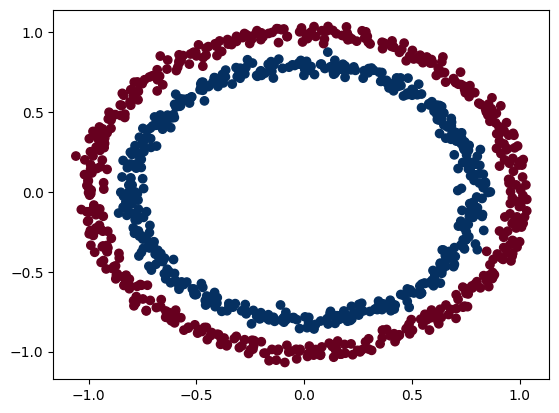

In [1]:
### 6.1 recreating non-lineaerity data (red and blue )

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_sample =1000

X,y = make_circles(n_sample,
                 noise = 0.03,
                random_state =42)
plt.scatter(X[:,0],X[:,1] ,c =y , cmap = plt.cm.RdBu )

In [2]:
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [3]:
# convert data to tensor and then to train and test splits 
import torch 
from sklearn.model_selection import train_test_split

# trun data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split into train and test sets
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)



In [4]:
X_train[:5] ,y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non linearity 
* linear = stragiht line 
* non-linear = non-straight line
  Artificial nueral network are a large combination of linear and non_linear function which are potentially able to find the patterns 

In [5]:
# build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features =2 ,out_features =10)
        self.layer_2 = nn.Linear(in_features =10 ,out_features =10)
        self.layer_3 = nn.Linear(in_features =10 ,out_features =1)
        self.relu = nn.ReLU() # it is a non-linear activation function 

    def forward(self,X):
        # where should we put our non_linear actication function 
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X)))))

model_3 =CircleModelV2()
model_3 

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [6]:
# setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                           lr =0.1)

/home/anubhav/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [7]:
def accruracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [8]:
X_train.size()

torch.Size([800, 2])

#### 6.3 training a model with non-linearity


In [12]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data to the target data
# X_train,y_train , = X_train.to(device) ,y_train.to(device )
# X_test ,y_test = X_test.to(device) , y_test.to(device)

# loop though data
epochs =1800

for epoch in range (epochs):
    model_3.train()

    # forward pass
    print(X_train.size())
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) 

    # calculate the loss
    print(y_logits.size())
    loss = loss_fn(y_logits,y_train)
    acc =accruracy_fn(y_true = y_train,
                    y_pred = y_pred)

   # optimizer 
    optimizer.zero_grad()

  # backpropogation 
    loss.backward()

   # step the optimizer 
    optimizer.step()

   # evalueation 
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc =  accruracy_fn(y_true = y_test,
                               y_pred = test_pred)
    if epoch%100 == 0:
        print(f'epoch {epoch}  | Loss: {loss:.5f} | Acc{acc:.2f} | test loss{test_loss:.4f} | test_acc {test_acc:.2f}')

torch.Size([800, 2])
torch.Size([800])
epoch 0  | Loss: 0.00398 | Acc100.00 | test loss0.0167 | test_acc 100.00
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Size([800])
torch.Size([800, 2])
torch.Siz

In [12]:
y_logits.size()

torch.Size([800])

In [13]:
X_train.size()

torch.Size([800, 2])

### 6.4 evaluating a model trained with non -linaear acyivation function 


In [74]:
# make prediction 
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

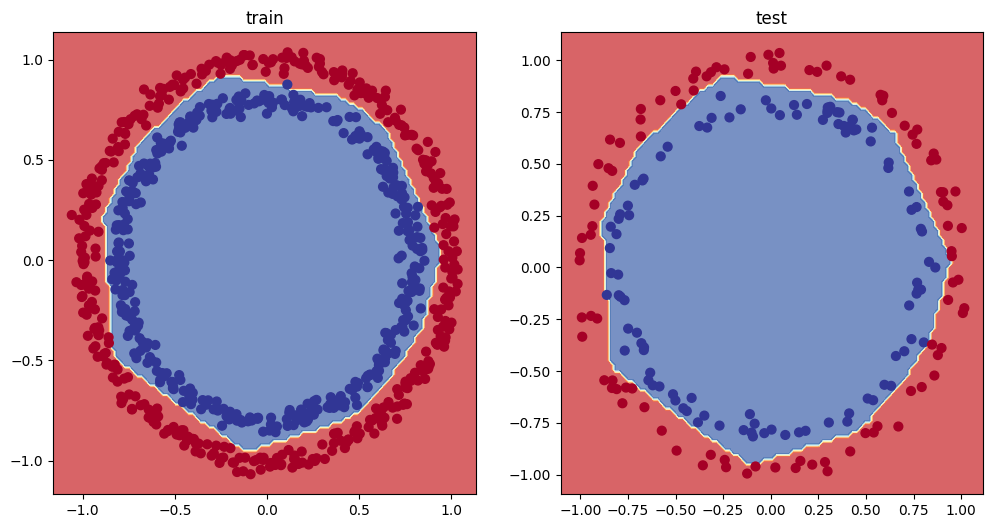

In [75]:
# plot the graph
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_3,X_test,y_test)

In [76]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.9300,  1.5243],
                      [-0.5232,  1.9216],
                      [-0.1549,  0.1427],
                      [-2.3392, -0.1767],
                      [ 0.6889, -2.3658],
                      [ 1.2308, -0.0741],
                      [ 1.6332,  0.1051],
                      [ 0.3410, -0.0998],
                      [ 0.8671,  0.7070],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.2412, -0.9001, -0.2872, -0.4221, -0.5646, -0.5747, -0.7351, -0.4252,
                      -0.2219, -0.6984])),
             ('layer_2.weight',
              tensor([[-0.0311, -0.7215,  0.2441, -0.3385, -0.4142, -0.0497, -0.2312,  0.2555,
                       -0.1172, -0.0997],
                      [ 1.5930,  1.8717,  0.1331,  2.1387,  2.0953,  1.0247,  1.5361,  0.0566,
                        0.9802, -0.1927],
                      [-0.3130, -0.1244, -0.2426,  0.1733,  0.0911,  0.1

## replicating non-linear function 

Nueral network , rather than us telling the model what to learn we give it the tools 
to discover pattern in data it tries to figure out the patterns on its own
And these are non-linear function 


In [77]:
# create a tensor 
A =torch.arange(-10 ,10,1 ,dtype = torch.float32)
A.dtype

torch.float32

In [78]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

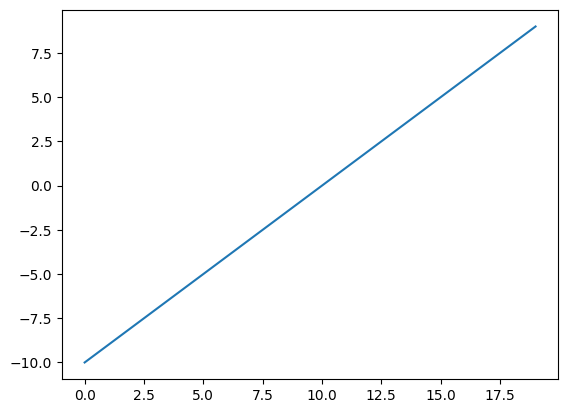

In [79]:
## visualise the data 
plt.plot(A)

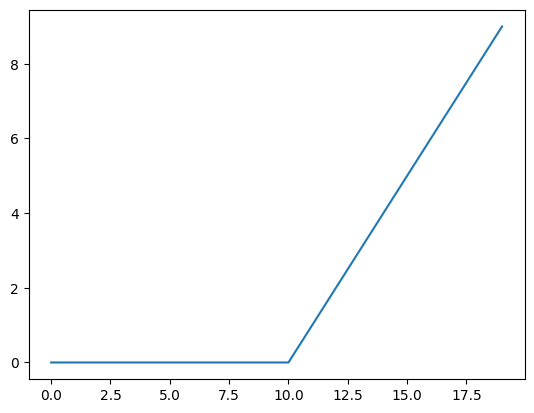

In [80]:
plt.plot(torch.relu(A))

In [81]:
def relu(x):
    return torch.maximum(torch.tensor(0),x) # input must be tensor

A_relu = relu(A)

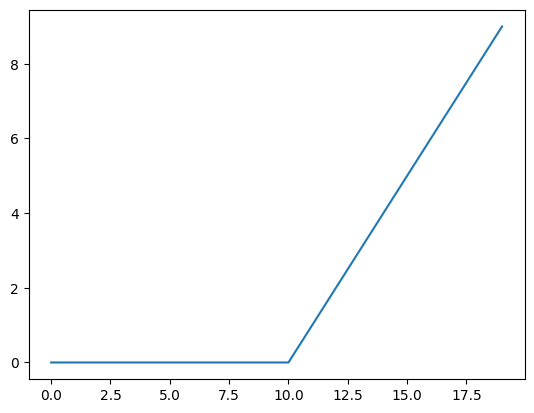

In [82]:
plt.plot(A_relu)

#### Let do the same thing for sigmoid 

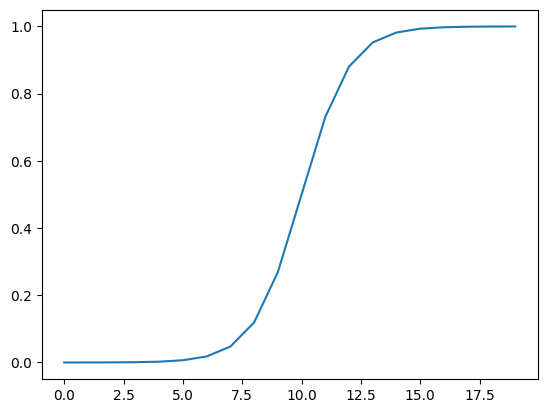

In [83]:
plt.plot(torch.sigmoid(A))

In [84]:
## custom sigmoid 
def sigmoid(x):
    return 1 / (1+ torch.exp(-x))

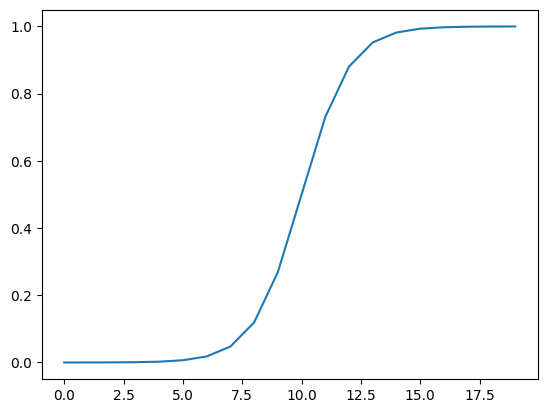

In [85]:
plt.plot(sigmoid(A))

## 8. putting all together  with a multiclass classification problem 
* binary classification = one thing or another (cat vs dog ,spam vs not spam  , froud vs not-froud)
* multiclass = (cat vs dog vs chicken )
  

In [86]:
### creating a toy dependencies 
import torch 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

[[-8.41339595  6.93516545]
 [-5.76648413 -6.43117072]
 [-6.04213682 -6.76610151]
 [ 3.95083749  0.69840313]
 [ 4.25049181 -0.28154475]] tensor([3, 2, 2, 1, 1])


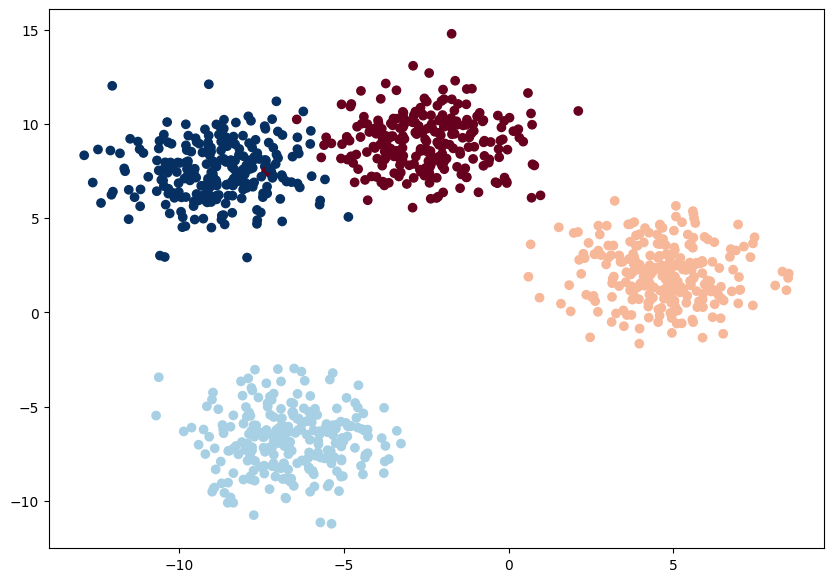

In [139]:
from sklearn.model_selection import train_test_split

# set the hyperparameters  
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. create multi-class data
X_blob , y_blob = make_blobs(n_samples =1000,
                             n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5 ,# give the cluster a little shake up
                            random_state = RANDOM_SEED)
# turn data into tensor 
x_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5] , y_blob[:5])

#3. split into train and test
X_blob_train , X_blob_test ,y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob ,
                                                                         test_size =0.2,
                                                                         random_state =42)

X_blob_train = torch.from_numpy(X_blob_train).type(torch.float)
X_blob_test = torch.from_numpy(X_blob_test).type(torch.float)


plt.figure(figsize = (10,7))
plt.scatter(X_blob[:,0] , x_blob[:,1] , c =y_blob ,cmap = plt.cm.RdBu)


In [117]:
## create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu' 

In [89]:
device

'cpu'

In [140]:
# build a multiclass classification 
class BlobModel(nn.Module):
    def __init__(self,input_features ,output_features , hidden_units = 8):
        """ Initialize a multi-class classification model .
         Args:
         input features : number of inputea features to the modl 
         ouput feauers : number of features output 
         hidden _units : hidden layer 

        return :
         """
        super().__init__()
        self.linear_layer_stack =nn.Sequential(
            nn.Linear(in_features =input_features,out_features =hidden_units),
            nn.ReLU(),
            nn.Linear(in_features =hidden_units,out_features =hidden_units),
            nn.ReLU(),
            nn.Linear(in_features =hidden_units,out_features = output_features)
        )
    def forward(self,X):
        return self.linear_layer_stack(X)

# cretate an instance of blobmodel
model_4 = BlobModel(input_features = 2,
                   output_features = 4,
                   hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 loss function and optimizer 



In [141]:
# loss function 
loss_fn = nn.CrossEntropyLoss()

# optimizer 
optimizer = torch.optim.SGD(params = model_4.parameters(),
                     lr = 0.1) # learning rate is a hyperparameter

### getting prediction probilites for a multi-class pytorch 

in order to evaluate and train and test our model 
* Logits (raw output of the model ) -> pred probs (use torch.softmax) -> pred labels(take the argmax of the prediction probilities )
* 

In [142]:
# let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
y_preds[:10]

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [143]:
# put the data on the targer device
X_blob_train ,y_blob_train = X_blob_train.to(device) ,y_blob_train.to(device)
X_blob_test ,y_blob_test = X_blob_test.to(device) ,y_blob_test.to(device)


In [144]:
# convert our model logits outputs to prediction probilites 
y_logits = model_4(X_blob_test.to(device))
y_pred_probs = torch.softmax(y_logits,dim =1)
print(y_pred_probs[:5])
print(y_logits[:5])

tensor([[0.2142, 0.1933, 0.2241, 0.3685],
        [0.0990, 0.1497, 0.1507, 0.6006],
        [0.2716, 0.1469, 0.2999, 0.2816],
        [0.2332, 0.2023, 0.2337, 0.3307],
        [0.0996, 0.1228, 0.1431, 0.6345]], grad_fn=<SliceBackward0>)
tensor([[-0.1343, -0.2370, -0.0892,  0.4084],
        [-0.7287, -0.3150, -0.3083,  1.0743],
        [ 0.0334, -0.5814,  0.1323,  0.0696],
        [-0.0599, -0.2021, -0.0579,  0.2893],
        [-0.6438, -0.4344, -0.2812,  1.2078]], grad_fn=<SliceBackward0>)


In [136]:
torch.sum(y_pred_probs[0])

tensor(1.0000, grad_fn=<SumBackward0>)

In [132]:
torch.max(y_pred_probs[0])

tensor(0.3539, grad_fn=<MaxBackward1>)

In [148]:
# convert our models probs to predictoin
y_preds =torch.argmax(y_preds,dim =1)
y_preds

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [138]:
y_blob_train.dtype

torch.int64

## 8.5 create a tainig and testing loop for a multi-class pytorch 


In [160]:
# fit the multi-class model to the data 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epochs 
epochs =120

# put datra to the target device
# put the data on the targer device
X_blob_train ,y_blob_train = X_blob_train.to(device) ,y_blob_train.to(device)
X_blob_test ,y_blob_test = X_blob_test.to(device) ,y_blob_test.to(device)

# loop through data 
for epoch in range(epochs):
    ## training 
    model_4.train()

    y_logits = model_4(X_blob_train)
    y_pred =torch.softmax(y_logits,dim =1 ).argmax(dim =1 )

    loss = loss_fn(y_logits,y_blob_train)
    acc = accruracy_fn(y_true = y_blob_train ,
                      y_pred =y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # testing code
    model_4.eval()
    with torch.inference_mode():
        test_logits  = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits ,dim =1).argmax(dim =1)

        test_loss = loss_fn(test_logits ,y_blob_test)
        test_acc =accruracy_fn(y_true = y_blob_test,
                              y_pred = test_preds)

    if epoch%10 == 0:
        print(f"epoch : {epoch} | loss {loss} |  Acc {acc}% | test_loss {test_loss} | test acc: {test_acc: } % ")

epoch : 0 | loss 0.07633678615093231 |  Acc 99.125% | test_loss 0.05607633665204048 | test acc:  99.5 % 
epoch : 10 | loss 0.07360881567001343 |  Acc 99.25% | test_loss 0.053847964853048325 | test acc:  99.5 % 
epoch : 20 | loss 0.07112756371498108 |  Acc 99.25% | test_loss 0.05182088539004326 | test acc:  99.5 % 
epoch : 30 | loss 0.06886298954486847 |  Acc 99.25% | test_loss 0.04996783658862114 | test acc:  99.5 % 
epoch : 40 | loss 0.06678973883390427 |  Acc 99.25% | test_loss 0.04827170819044113 | test acc:  99.5 % 
epoch : 50 | loss 0.06488485634326935 |  Acc 99.25% | test_loss 0.046710167080163956 | test acc:  99.5 % 
epoch : 60 | loss 0.06312888860702515 |  Acc 99.25% | test_loss 0.045269742608070374 | test acc:  99.5 % 
epoch : 70 | loss 0.0615055225789547 |  Acc 99.25% | test_loss 0.043937839567661285 | test acc:  99.5 % 
epoch : 80 | loss 0.0600007101893425 |  Acc 99.25% | test_loss 0.04270192235708237 | test acc:  99.5 % 
epoch : 90 | loss 0.05860219895839691 |  Acc 99.25% |

In [15]:
### 8.6Making and evaluating prediction with a pytorch multi-clas model 
model_4.eval()
with torch.inference_mode():
    y_logits  = model_4(X_blob_test)

y_logits.sample(5)

NameError: name 'model_4' is not defined

In [163]:
# go from logits -> prediction 
y_pred_probs = torch.softmax(y_logits,dim =1)
y_pred_probs

tensor([[3.7310e-02, 8.9505e-01, 3.4179e-02, 3.3463e-02],
        [4.5008e-04, 1.5240e-05, 3.3461e-05, 9.9950e-01],
        [5.5225e-10, 5.1708e-07, 9.9994e-01, 5.8135e-05],
        [3.7310e-02, 8.9505e-01, 3.4179e-02, 3.3463e-02],
        [9.9877e-01, 7.5802e-04, 1.6405e-05, 4.5919e-04],
        [4.1539e-05, 6.3409e-07, 5.6194e-06, 9.9995e-01],
        [1.6158e-08, 7.4481e-06, 9.9983e-01, 1.6281e-04],
        [9.9936e-01, 2.4799e-04, 5.8870e-06, 3.8632e-04],
        [1.2509e-12, 6.5341e-09, 9.9996e-01, 3.8949e-05],
        [9.9926e-01, 4.1830e-04, 8.8853e-06, 3.1523e-04],
        [9.9600e-01, 5.0112e-04, 1.8852e-05, 3.4767e-03],
        [3.7310e-02, 8.9505e-01, 3.4179e-02, 3.3463e-02],
        [9.9941e-01, 3.3420e-04, 6.9151e-06, 2.5235e-04],
        [9.9983e-01, 6.0769e-05, 1.2701e-06, 1.1195e-04],
        [9.9990e-01, 3.3882e-05, 6.5632e-07, 6.0746e-05],
        [8.7229e-03, 1.5820e-04, 1.2403e-04, 9.9099e-01],
        [2.3588e-04, 8.7513e-06, 3.1641e-05, 9.9972e-01],
        [1.419

In [164]:
y_preds =torch.argmax(y_pred_probs,dim =1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [165]:
## visual 


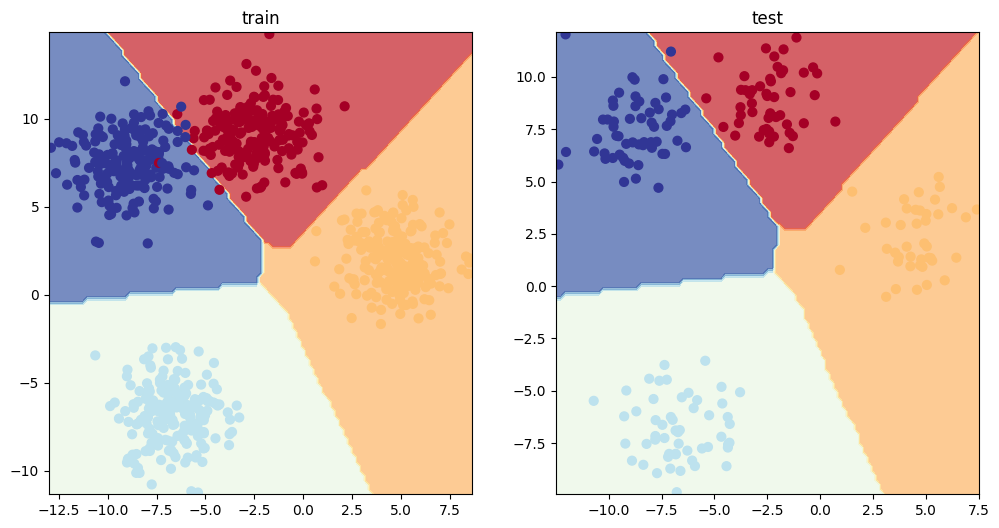

In [167]:
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_4,X_blob_test,y_blob_test)


### 9. a few classification metrics 
* accuray - out of 100 , how many does our model get right
* precision
* recall
* f1-score
* confucsion matrix
* classification
* 